In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

import data_preprocessing
%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
import imp
data_preprocessing = imp.reload(data_preprocessing)

In [6]:
output_path = "./Plots/"


In [7]:
data_original = pd.read_csv('./Data Mining VU data/training_set_VU_DM_2014.csv')

In [13]:
len(data_original)

4958347

In [14]:
n_select = 4400000
df = data_original.tail(n_select)
df_original = data_original.tail(n_select)
data = data_original.tail(n_select)

#  Feature Engineering

## Composite features
Rank by group
1. Extract season: autumn, summer, winter 


In [15]:
df['date_time']= pd.to_datetime(df['date_time'])

df["month"] = df["date_time"].dt.month

df = df.drop(['date_time'], axis=1)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying t

In [16]:
all_cols = df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])


### NEW FEATURES

In [17]:
df['price_diff_from_historic_mean']= df.price_usd - df.visitor_hist_adr_usd
df['star_diff_from_historic_mean']= df.prop_starrating - df.visitor_hist_starrating

### Outliers
For features with high value outliers cap to maximum

In [18]:
df_before = df.copy()
df = data_preprocessing.remove_outliers(df)
create_plots=None

/Users/efiathieniti/PycharmProjects/DM2018/Assignment2/data_preprocessing.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feature][df[feature]>df[feature].quantile(0.99)] = df[feature].quantile(0.99)
/Users/efiathieniti/PycharmProjects/DM2018/Assignment2/data_preprocessing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feature][df[feature]<df[feature].quantile(0.01)] = df[feature].quantile(0.01)


In [19]:

if create_plots:
    
    for feature in all_cols:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)  
        df_before[[feature]].hist(bins=10, ax=ax2)
        df[[feature]].hist(bins=10, ax=ax1)
        plt.savefig(output_path + "hist_remove_outliers_%s.png"%feature, format='png')

        plt.show()



In [20]:
# about 15 mins for the full dataset.. 

df = data_preprocessing.create_composite_features(df)
# Remove outliers before normalizing?
df = data_preprocessing.normalize_within_group(df)
df['log_price_usd'].quantile(0.99)  

/Users/efiathieniti/PycharmProjects/DM2018/Assignment2/data_preprocessing.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feature][df[feature].isnull()] = df[feature].median()
/Users/efiathieniti/PycharmProjects/DM2018/Assignment2/data_preprocessing.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feature][df[feature].isnull()] = df[feature].median()


2.7774268223893115

### Set Missing values to median
Do this after new features are created?

In [21]:
all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])

for feature in all_cols:
    df[feature][df[feature].isnull()] = df[feature].median()


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# Subselect columns - include booking_book
summary_metrics = pd.DataFrame(df.describe())

In [23]:
df=df[list(summary_metrics.columns)]

In [24]:
summary_metrics

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,star_rank,value_for_money,prop_location_score1_norm,prop_location_score2_norm,prop_location_score_mean,comp1_rate_percent_diff_log,price_usd_norm_srch_id,log_price_usd,value_for_money_norm_srch_id,price_usd_norm_prop_id
count,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,...,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06,4.400000e+06
mean,1.851056e+05,9.969880e+00,1.753072e+02,3.436586e+00,1.529785e+02,1.739828e+02,7.007564e+04,3.179485e+00,3.776902e+00,6.342225e-01,...,1.041816e+02,1.802217e+00,1.001034e-11,-1.012278e-11,-7.036458e-14,1.002802e+00,-3.253408e-04,2.103782e+00,2.789130e-04,1.015676e-17
std,8.525302e+04,7.620264e+00,6.579302e+01,1.561398e-01,2.174494e+01,6.815347e+01,4.058659e+04,1.051224e+00,1.050879e+00,4.816476e-01,...,7.712624e+02,4.976130e-01,1.000000e+00,1.000000e+00,8.416843e-01,8.621827e-02,9.792184e-01,2.521961e-01,9.792833e-01,1.414623e-01
min,4.022000e+04,5.000000e+00,1.500000e+01,2.000000e+00,4.477000e+01,1.400000e+01,1.402000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,-1.882365e+00,-8.284044e-01,-1.355385e+00,3.010300e-01,-5.480078e+00,1.531479e+00,-5.386868e+00,-3.096153e+00
25%,1.113940e+05,5.000000e+00,1.000000e+02,3.440000e+00,1.518600e+02,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000e+00,1.687146e+00,-7.080632e-01,-6.247474e-01,-5.909314e-01,1.000000e+00,-6.943323e-01,1.929419e+00,-4.379015e-01,0.000000e+00
50%,1.851760e+05,5.000000e+00,2.190000e+02,3.440000e+00,1.518600e+02,2.190000e+02,6.962700e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,1.100000e+01,1.886282e+00,-6.514932e-02,-3.374838e-01,-1.579709e-01,1.000000e+00,-1.861750e-01,2.086360e+00,1.808988e-01,0.000000e+00
75%,2.589670e+05,1.400000e+01,2.190000e+02,3.440000e+00,1.518600e+02,2.190000e+02,1.051640e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,1.800000e+01,2.070692e+00,7.680146e-01,1.520076e-01,4.431051e-01,1.000000e+00,5.366921e-01,2.265973e+00,6.145611e-01,0.000000e+00
max,3.298500e+05,3.200000e+01,2.200000e+02,5.000000e+00,5.613600e+02,2.200000e+02,1.393740e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1.098500e+04,3.264818e+00,2.237532e+00,4.300180e+00,3.268856e+00,3.815246e+00,5.570940e+00,2.777427e+00,4.740206e+00,1.851902e+00


### Calculate correlation and mutual information/information gain

### Histograms

## Distribution of each feature for booked and not booked hotels
Helps find the most discriminative features

In [25]:
# Create the relevance class
all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])
df["relevance"] = df["booking_bool"]+ df["click_bool"]
df['relevance'] = df['relevance'].map({0:0, 1:1, 2:5})
class_to_plot = "relevance"

In [26]:
if create_plots:
    for feature in all_cols:
        try:
            fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))  
            df.groupby(class_to_plot)[feature].plot(kind='kde', ax=ax1, label=class_to_plot)

            plt.title(feature)

            data.groupby(class_to_plot)[feature].plot(kind='kde', ax=ax2)
            plt.savefig(output_path + "densityplot_before_after_%s.png"%feature, format='png')
            plt.show()
        except:
            pass


In [27]:
all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position', 'relevance'])


# Correlation with booking

In [28]:
df['prop_starrating_monot']=abs(df.prop_starrating - df.prop_starrating.mean())

def categorical_plot(df, feature, class_to_plot):
    cat_feat = 'cat'
    df_temp=df
    df_temp[cat_feat]=pd.cut(df[feature], right=False, bins=5)
    sp = sns.pointplot(x=cat_feat, y=class_to_plot, data=df_temp)
    plt.xlabel(feature)
    plt.xticks(rotation=70)
    plt.show()
    


#sns.swarmplot(x='prop_starrating', y="booking_bool", data=df)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


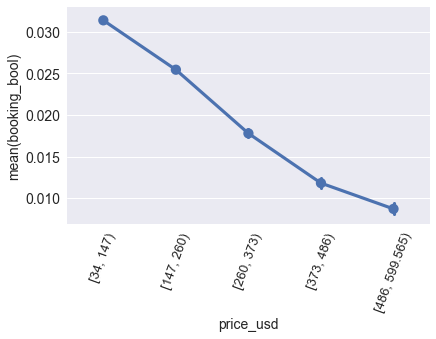

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-6d86ba2d6434>", line 16, in <module>
    categorical_plot(df,feature,class_to_plot )
  File "<ipython-input-28-d9a1e3daf42d>", line 7, in categorical_plot
    sp = sns.pointplot(x=cat_feat, y=class_to_plot, data=df_temp)
  File "/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py", line 3067, in pointplot
    orient, color, palette, errwidth, capsize)
  File "/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py", line 1611, in __init__
    self.estimate_statistic(estimator, ci, n_boot)
  File "/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py", line 1451, in estimate_statistic
    units=unit_data)
  File "/Users/efiathien

KeyboardInterrupt: 

In [29]:

# New feature creation
# TODO: move to data_preprocessing file 
# Here to compare before and after
group='srch_id'

feature = "log_price_usd"
feature = "price_usd"
df_original[feature] = df[feature]
df['price_usd_norm_srch_id'] = data_preprocessing.normalize(df_original, feature, group)

class_to_plot = "relevance"
class_to_plot = "booking_bool"
categorical_plot(df,feature , class_to_plot)
feature = "price_usd_norm_srch_id"
categorical_plot(df,feature,class_to_plot )

feature = "value_for_money"
#categorical_plot(df,feature,class_to_plot )
#feature = "value_for_money_norm_srch_id"
#categorical_plot(df,feature,class_to_plot )

feature = "log_price_usd"
df_original[feature] = df[feature]
df['price_usd_log_norm_srch_id'] = data_preprocessing.normalize(df_original, feature, group)

class_to_plot = "relevance"
class_to_plot = "booking_bool"
categorical_plot(df,feature , class_to_plot)
feature = "price_usd_log_norm_srch_id"
categorical_plot(df,feature,class_to_plot )

feature = "value_for_money"
#categorical_plot(df,feature,class_to_plot )
#feature = "value_for_money_norm_srch_id"
#categorical_plot(df,feature,class_to_plot )


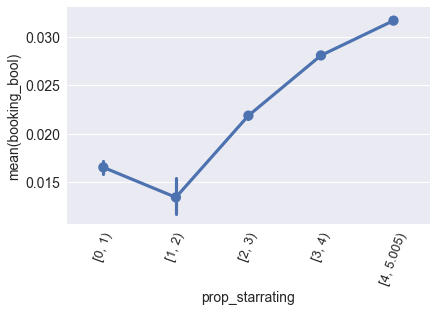

In [30]:
feature = "prop_starrating"
categorical_plot(df,feature,class_to_plot)

In [ ]:
feature = "srch_booking_window"
class_to_plot = "relevance"
feature = "prop_location_score1"
categorical_plot(df,feature,class_to_plot)
feature = "prop_location_score2"
categorical_plot(df,feature,class_to_plot)
feature = "prop_location_score_mean"
categorical_plot(df,feature,class_to_plot)

In [ ]:
# Can we improve this one?
feature = "prop_brand_bool"
categorical_plot(df,feature,class_to_plot)

In [ ]:
feature = "comp4_rate_percent_diff"
df[feature+"_log"]=np.log10(df_original[feature])
df[feature] = df_original[feature]
df[feature].hist()
plt.show()
categorical_plot(df,feature,class_to_plot)
feature =feature+"_log"
categorical_plot(df,feature,class_to_plot)

In [31]:

for feature in all_cols:
    df[feature][df[feature].isnull()] = df[feature].median()


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [32]:
create_plots=None
comp_feats=['comp1_rate','comp2_rate','comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate']

for feat in comp_feats:


    df[feat + "_percent_diff_signed"]=np.log10(df_original[feat+"_percent_diff"])*df_original[feat]
    #df[feat + "_percent_diff_signed"] = np.log10(df[feat + "_percent_diff_signed"]).replace([np.inf, -np.inf], np.nan)
    if create_plots:
        categorical_plot(df,feat + "_percent_diff_signed",class_to_plot)

    feature =  feat + "_percent_diff_signed"
    df[feature+"_norm"]=(df[feature] - df[feature].mean()) / (df[feature].std())

    feature = feat + "_percent_diff_signed_norm"
    if create_plots:
        categorical_plot(df,feature,class_to_plot)
    plt.show()
    



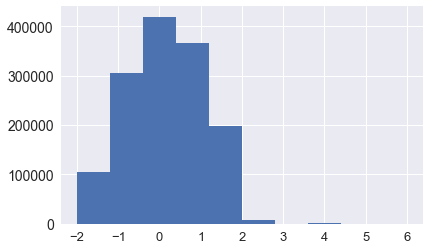

In [33]:

# Take an average of the comp1_rate_percent_diff after normalizing
comp_feats=['comp1_rate','comp2_rate','comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate']
comp_feats_signed=[]
for feat in comp_feats:
    comp_feats_signed.append(feat+'_percent_diff_signed')
    
df['comp_rate_percent_diff_mean']=df[comp_feats_signed].mean(axis=1)
df['comp_rate_percent_diff_mean'].hist()
plt.show()
if create_plots:
    categorical_plot(df,'comp_rate_percent_diff_mean',class_to_plot)



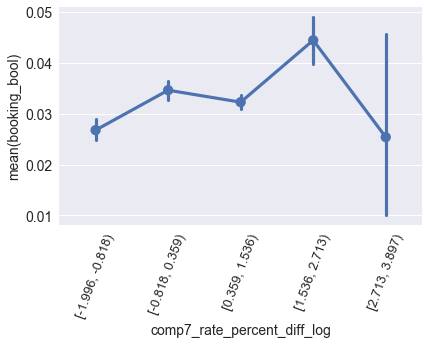

In [34]:
feat = "comp7_rate"
df[feat + "_percent_diff_log"]=np.log10(df_original[feat+"_percent_diff"])*df_original[feat]
df[feat + "_percent_diff_log"] = df[feat + "_percent_diff_log"].replace([np.inf, -np.inf], np.nan)
categorical_plot(df,feat + "_percent_diff_log",class_to_plot)

### Comments and Findings

Position bias 

In [ ]:

discriminative_features = ['position']

feature = discriminative_features[0]
df.groupby("booking_bool")[feature].plot(kind='kde')
plt.title(feature)
plt.show()

## Mutual information with booking 
Gives the most important features based on univariate statistics

In [35]:
try:
    df = df.drop(['cat'], axis=1)
except:
    pass


In [36]:
all_cols = df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position'])
for feature in all_cols:
    df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
    df[feature][df[feature].isnull()] = df[feature].median()


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

In [37]:
# correlated features, they were used to create new ones therefore drop to reduce 
# mutual info calculation 
TO_DROP=[
 'comp1_rate','comp2_rate','comp3_rate','comp4_rate','comp5_rate',
 'comp6_rate','comp7_rate','comp8_rate',
 'comp6_rate_percent_diff',
 'comp4_rate_percent_diff',
 'comp7_rate_percent_diff',
 'comp1_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp2_rate_percent_diff',
 'comp8_rate_percent_diff',
 'comp5_rate_percent_diff',
 'comp1_rate_percent_diff_signed_norm',
 'comp2_rate_percent_diff_signed_norm',
 'comp4_rate_percent_diff_signed_norm',
 'comp8_rate_percent_diff_signed_norm',
 'comp3_rate_percent_diff_signed_norm',
 'comp5_rate_percent_diff_signed_norm',
 'comp6_rate_percent_diff_signed_norm',
 'comp7_rate_percent_diff_signed_norm']

In [38]:
df = df.drop(TO_DROP, axis=1)


Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_inv', 'comp2_inv',
       'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv',
       'comp8_inv', 'year', 'month', 'price_diff_from_historic_mean',
       'star_diff_from_historic_mean', 'price_rank', 'star_rank',
       'value_for_money', 'prop_location_score1_norm',
       'prop_location_score2_norm', 'prop_location_score_mean',
       'comp1_rate_percent_diff_log', 'price_usd_n

In [ ]:
# why does relevance have nans?


In [45]:
from sklearn.feature_selection import mutual_info_classif

all_cols=df.columns.drop(['booking_bool', 'click_bool', 'gross_bookings_usd', 'position', 'relevance', 'year'])
all_cols

df_subset = df.tail(2000000)

run_mutual_information = True
#mutual_information_click = mutual_info_classif(df[all_cols], df[['click_bool']], discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
#click_df = pd.DataFrame(mutual_information_click.flatten(), columns = ['mutual_info'])
#click_df['feature'] = df[all_cols].columns.values

if run_mutual_information:
    #all_cols = comp_feats_signed+['comp_rate_percent_diff_mean']
    mutual_information_relevance = mutual_info_classif(df_subset[all_cols], df_subset[['relevance']], discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
    relevance_df = pd.DataFrame(mutual_information_relevance.flatten(), columns = ['mutual_info'])
    relevance_df['feature'] = df_subset[all_cols].columns.values



/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


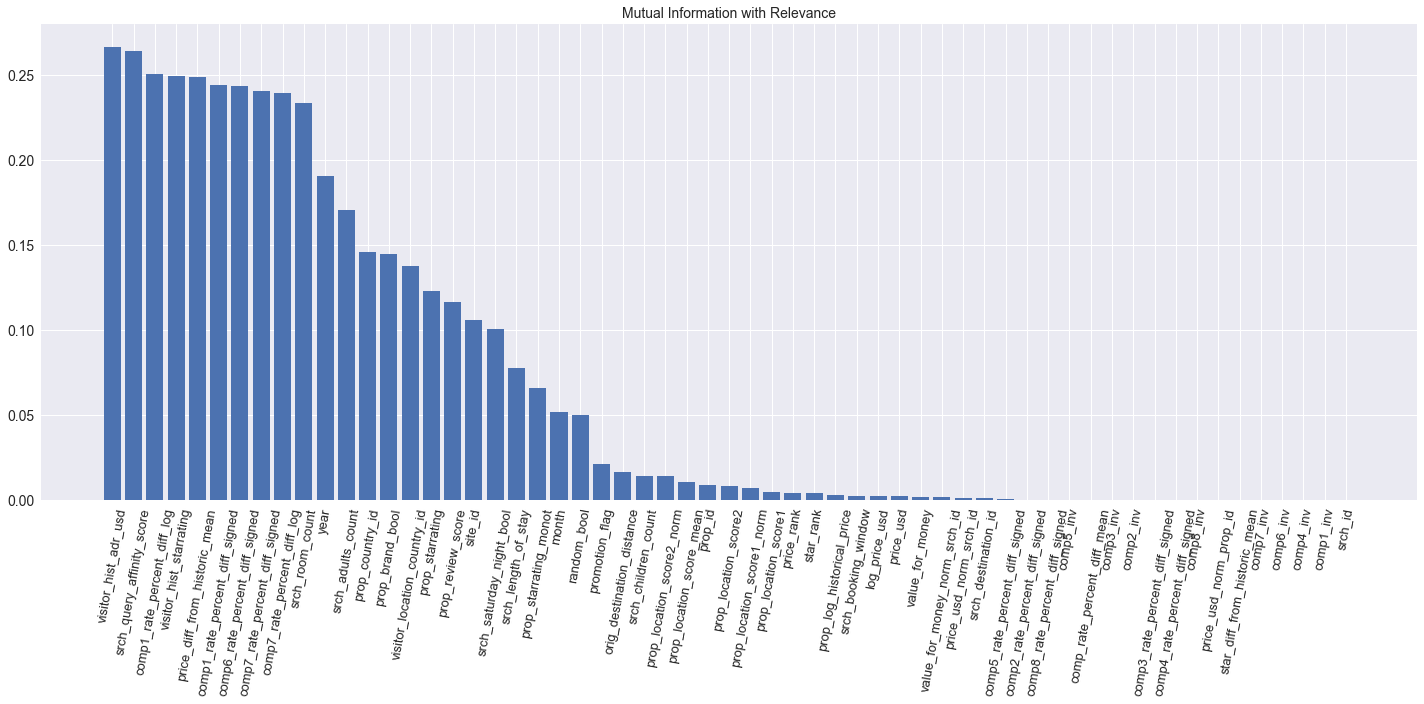

In [48]:
# ind = np.arange(len(mutual_information_book))
# fig, ax = plt.subplots(figsize=(20,7)) 

# plt.bar(ind, click_df.sort('mutual_info', ascending=False)['mutual_info'])
# plt.xticks(ind,click_df.sort('mutual_info', ascending=False)['feature'], rotation=80)
# plt.title('Mutual Information with Relevance Bool')
# plt.savefig(output_path + "MutualInformation_click_bool.png", format='png')
# plt.show()


# ind = np.arange(len(mutual_information_click))
# fig, ax = plt.subplots(figsize=(20,7)) 

# plt.bar(ind, book_df.sort('mutual_info', ascending=False)['mutual_info'])
# plt.xticks(ind,book_df.sort('mutual_info', ascending=False)['feature'], rotation=80)
# plt.title('Mutual Information with Booking Bool')
# plt.savefig(output_path + "MutualInformation_book_bool.png", format='png')
# plt.show()

if run_mutual_information:
    ind = np.arange(len(mutual_information_relevance))
    fig, ax = plt.subplots(figsize=(20,10)) 

    plt.bar(ind, relevance_df.sort('mutual_info', ascending=False)['mutual_info'])
    plt.xticks(ind,relevance_df.sort('mutual_info', ascending=False)['feature'], rotation=80)
    plt.title('Mutual Information with Relevance')
    plt.tight_layout()
    plt.savefig(output_path + "MutualInformation_relevance_%s_%s.png"%(df.shape[1], df.shape[0]), format='png')
    plt.show()



In [49]:
best= relevance_df.sort('mutual_info', ascending=False)['feature'][:55].values
list(best )

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


['visitor_hist_adr_usd',
 'srch_query_affinity_score',
 'comp1_rate_percent_diff_log',
 'visitor_hist_starrating',
 'price_diff_from_historic_mean',
 'comp1_rate_percent_diff_signed',
 'comp6_rate_percent_diff_signed',
 'comp7_rate_percent_diff_signed',
 'comp7_rate_percent_diff_log',
 'srch_room_count',
 'year',
 'srch_adults_count',
 'prop_country_id',
 'prop_brand_bool',
 'visitor_location_country_id',
 'prop_starrating',
 'prop_review_score',
 'site_id',
 'srch_saturday_night_bool',
 'srch_length_of_stay',
 'prop_starrating_monot',
 'month',
 'random_bool',
 'promotion_flag',
 'orig_destination_distance',
 'srch_children_count',
 'prop_location_score2_norm',
 'prop_location_score_mean',
 'prop_id',
 'prop_location_score2',
 'prop_location_score1_norm',
 'prop_location_score1',
 'price_rank',
 'star_rank',
 'prop_log_historical_price',
 'srch_booking_window',
 'log_price_usd',
 'price_usd',
 'value_for_money',
 'value_for_money_norm_srch_id',
 'price_usd_norm_srch_id',
 'srch_destin

In [43]:

df_2 = df.head(4100000)
df_2.to_pickle('cleaned_dataset')


### Only save selected features to allow upload to github 
not needed if running local

In [210]:


#Select the same features from each dataset
selected_features = ['comp6_rate_percent_diff_signed',
 'comp4_rate_percent_diff_signed',
 'comp8_rate_percent_diff_signed',
 'comp7_rate_percent_diff_signed',
 'star_diff_from_historic_mean',
 'visitor_hist_adr_usd',
 'srch_query_affinity_score',
 'srch_room_count',
 'visitor_hist_starrating',
 'price_diff_from_historic_mean',
 'srch_adults_count',
 'prop_brand_bool',
 'prop_country_id',
 'visitor_location_country_id',
 'prop_starrating',
 'prop_review_score',
 'srch_saturday_night_bool',
 'site_id',
 'srch_length_of_stay',
 'prop_starrating_monot',
 'random_bool',
 'promotion_flag',
 'prop_location_score_mean',
 'orig_destination_distance',
 'srch_children_count',
 'prop_location_score2',
 'prop_id',
 'star_rank']

selected_features = list(set(selected_features))
features_to_keep = ['booking_bool', 'srch_id', 'click_bool', 'prop_id', 'relevance']
all_possible_features = features_to_keep + selected_features
df_2 = df_2.ix[:,all_possible_features]



In [215]:
df_cut = df.head(4200000)
df_cut.to_pickle('cleaned_dataset')


In [216]:
list(relevance_df.sort('mutual_info', ascending=False)['feature'][1:50])


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


['comp4_rate_percent_diff_signed',
 'comp8_rate_percent_diff_signed',
 'comp7_rate_percent_diff_signed',
 'comp7_rate_percent_diff_log',
 'comp3_rate_percent_diff_signed',
 'comp2_rate_percent_diff_signed',
 'comp5_rate_percent_diff_signed',
 'star_diff_from_historic_mean',
 'visitor_hist_adr_usd',
 'comp1_rate',
 'comp6_rate_percent_diff',
 'comp1_rate_percent_diff_log',
 'comp4_rate_percent_diff',
 'srch_query_affinity_score',
 'comp7_rate_percent_diff',
 'comp1_rate_percent_diff',
 'comp3_rate_percent_diff',
 'srch_room_count',
 'comp2_rate_percent_diff',
 'comp8_rate_percent_diff',
 'visitor_hist_starrating',
 'price_diff_from_historic_mean',
 'comp1_rate_percent_diff_signed',
 'comp5_rate_percent_diff',
 'srch_adults_count',
 'prop_brand_bool',
 'prop_country_id',
 'visitor_location_country_id',
 'comp1_rate_percent_diff_signed_norm',
 'prop_starrating',
 'prop_review_score',
 'srch_saturday_night_bool',
 'site_id',
 'srch_length_of_stay',
 'comp4_rate_percent_diff_signed_norm',
 

In [75]:
features_to_keep = ['booking_bool', 'click_bool', 'srch_id', 'relevance']
selected_features = ['value_for_money','value_for_money_normalized','price_usd', 'price_usd_normalized','price_rank','price_diff_from_historic_mean', 'star_rank', 'prop_review_score', 'position',
                     'prop_brand_bool', 'prop_location_score1']

selected_features = ['comp6_rate_percent_diff_signed', 'comp4_rate_percent_diff_signed',
       'star_diff_from_historic_mean', 'visitor_hist_adr_usd',
       'srch_query_affinity_score',
       'srch_room_count', 'visitor_hist_starrating',
       'price_diff_from_historic_mean', 'srch_adults_count', 'prop_brand_bool',
       'prop_country_id', 'visitor_location_country_id', 'prop_starrating',
       'prop_review_score', 'srch_saturday_night_bool', 'site_id',
       'srch_length_of_stay', 'comp4_rate_percent_diff_signed_norm',
       'comp8_rate_percent_diff_signed_norm', 'prop_starrating_monot',
       'random_bool', 'comp3_rate_percent_diff_signed_norm']

all_possible_features = selected_features+features_to_keep

In [76]:
all_possible_features

['comp6_rate_percent_diff_signed',
 'comp4_rate_percent_diff_signed',
 'star_diff_from_historic_mean',
 'visitor_hist_adr_usd',
 'srch_query_affinity_score',
 'srch_room_count',
 'visitor_hist_starrating',
 'price_diff_from_historic_mean',
 'srch_adults_count',
 'prop_brand_bool',
 'prop_country_id',
 'visitor_location_country_id',
 'prop_starrating',
 'prop_review_score',
 'srch_saturday_night_bool',
 'site_id',
 'srch_length_of_stay',
 'comp4_rate_percent_diff_signed_norm',
 'comp8_rate_percent_diff_signed_norm',
 'prop_starrating_monot',
 'random_bool',
 'comp3_rate_percent_diff_signed_norm',
 'booking_bool',
 'click_bool',
 'srch_id',
 'relevance']

In [82]:
all_possible_features = list(set.intersection(set(all_possible_features), set(df.columns.values)))

In [94]:
correlation =df[all_possible_features+['relevance']].corr()

In [88]:
correlation

<bound method DataFrame.corr of         visitor_hist_adr_usd  visitor_location_country_id  \
0                     154.27                          187   
1                     154.27                          187   
2                     154.27                          187   
3                     154.27                          187   
4                     154.27                          187   
5                     154.27                          187   
6                     154.27                          187   
7                     154.27                          187   
8                     154.27                          187   
9                     154.27                          187   
10                    154.27                          187   
11                    154.27                          187   
12                    154.27                          187   
13                    154.27                          187   
14                    154.27                         

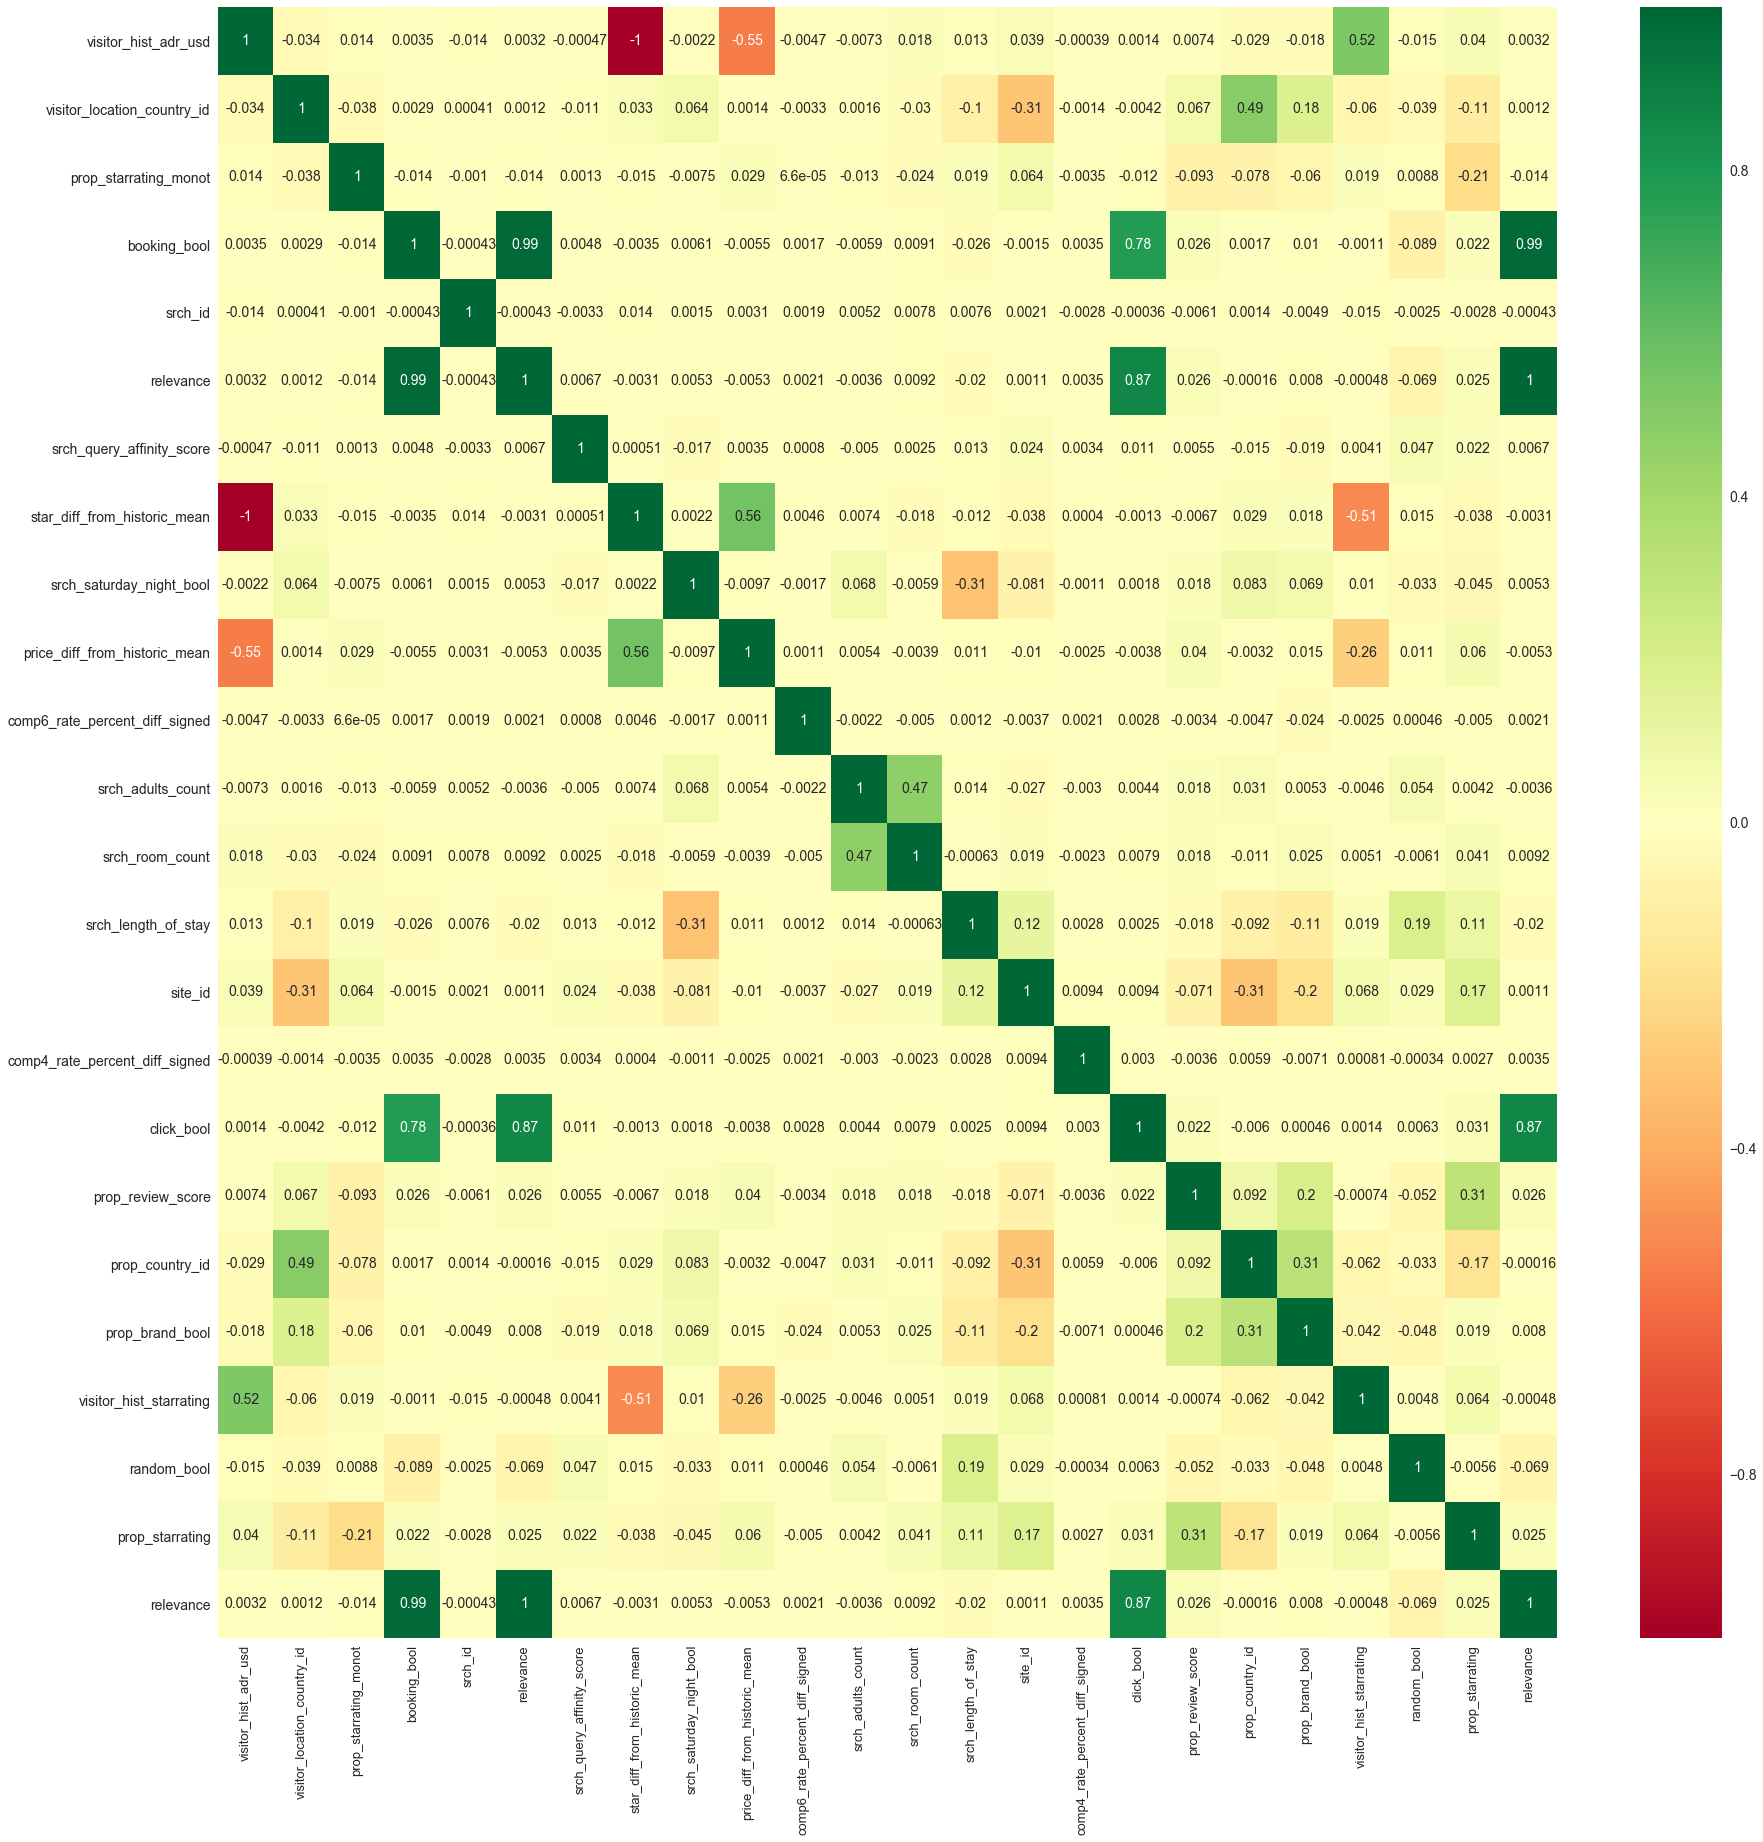

In [95]:

def plot_corr(data, correlation):
    fig, ax = plt.subplots(figsize=(30,30)) 
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    plt.savefig(output_path + "correlation_plot.png", format='png')

plot_corr(df[all_possible_features+['relevance']], correlation)





In [167]:
correlation.abs
c = correlation.abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so

prop_starrating_monot           comp6_rate_percent_diff_signed    0.000066
comp6_rate_percent_diff_signed  prop_starrating_monot             0.000066
relevance                       prop_country_id                   0.000155
                                prop_country_id                   0.000155
prop_country_id                 relevance                         0.000155
                                relevance                         0.000155
comp4_rate_percent_diff_signed  random_bool                       0.000339
random_bool                     comp4_rate_percent_diff_signed    0.000339
click_bool                      srch_id                           0.000356
srch_id                         click_bool                        0.000356
visitor_hist_adr_usd            comp4_rate_percent_diff_signed    0.000393
comp4_rate_percent_diff_signed  visitor_hist_adr_usd              0.000393
                                star_diff_from_historic_mean      0.000404
star_diff_from_historic_m